<a href="https://colab.research.google.com/github/ririzqah/classification-predict-streamlit-template/blob/master/Team16_model%20(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Climate Change Classification Predict**

## Team 16
- 
- 
- 
- 
- 
- 

## Introduction

### Predict Overview: Climate Change Challenge


## Problem Statement


## Objectives

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a id="one"></a>
## 1. Importing packages

In [83]:
# Libraries for data loading, data manipulation and data visulisation
import nltk
import re
import csv
import string
from PIL import Image
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Downloads
#nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Libraries for data preparation and model building
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

# Setting global constants to ensure notebook results are reproducible
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(12,8)})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="two"></a>
## 2. Loading the Data

In [41]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ririzqah/classification-predict-streamlit-template/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ririzqah/classification-predict-streamlit-template/master/test_with_no_labels.csv')

<a id="three"></a>
## 3. Data Preprocessing

In [42]:
#view train dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [43]:
#view train dataset
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [44]:
#combine train and test datasets
df=pd.concat([df_train,df_test])
df.head()

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


## Data size and Structure

In [45]:
#looking at the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26365 entries, 0 to 10545
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  float64
 1   message    26365 non-null  object 
 2   tweetid    26365 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 823.9+ KB


In [46]:
# Finding unique values in sentiment
df_train['sentiment'].unique()

array([ 1,  2,  0, -1])

In [47]:
#looking at the shape of the dataset
df.shape

(26365, 3)

## Handling missing values

In [48]:
# Make a copy of the df so that if we make mistakes we can always refer to the original df
df_new = df.copy()

In [50]:
# Check for the sum and percentage of null values in each feature
total_nans = df_new.isnull().sum().sort_values(ascending=False)
percent_nans = (df_new.isnull().mean() * 100).sort_values(ascending=False)
df_clean_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_clean_nans.head()

,Total NaN,Percent NaN
sentiment,10546,40.0
tweetid,0,0.0
message,0,0.0


## Removing noise from the dataset

In [55]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
#string of punctuations
print(string.punctuation)

#function to remove punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

df_train['message'] = df_train['message'].apply(remove_punctuation)
df_test['message'] = df_test['message'].apply(remove_punctuation)

# Remove all words below 3 characters
df_train['newmessage'] = df_train['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_test['newmessage'] = df_test['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Changing from uppercase to lowercase
df_train['newmessage'] = df_train['newmessage'].str.lower()
df_test['newmessage'] = df_test['newmessage'].str.lower()

df_train.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,sentiment,message,tweetid,newmessage
0,1,PolySciMajor EPA chief doesnt think carbon dio...,625221,polyscimajor chief doesnt think carbon dioxide...
1,1,Its not like we lack evidence of anthropogenic...,126103,like lack evidence anthropogenic global warming
2,2,RT RawStory Researchers say we have three year...,698562,rawstory researchers have three years climate ...
3,1,TodayinMaker WIRED 2016 was a pivotal year in...,573736,todayinmaker wired 2016 pivotal year climate c...
4,1,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,soynoviodetodas 2016 racist sexist climate cha...


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)

### Univariate Analysis

In [56]:
# look at data statistics
df.describe()

,sentiment,tweetid
count,15819.000000,26365.000000
mean,0.917504,499791.634971
std,0.836537,288678.408660
min,-1.000000,6.000000
25%,1.000000,249928.000000
50%,1.000000,499577.000000
75%,1.000000,748695.000000
max,2.000000,999983.000000


In [57]:
#Evaluating the kurtosis
df.kurtosis()

sentiment    0.122976
tweetid     -1.193841
dtype: float64

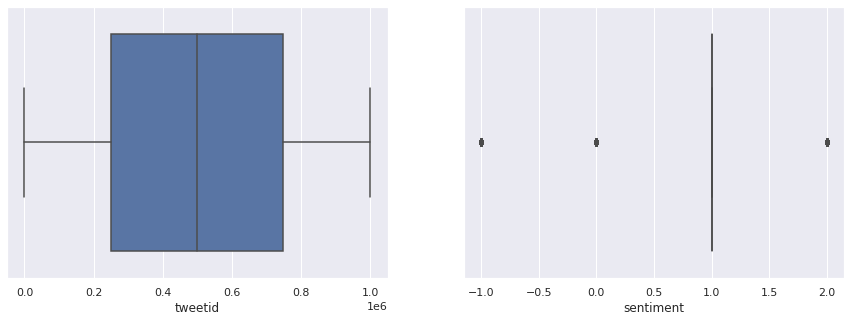

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
 
sns.boxplot(ax=axes[0], data=df_new, x='tweetid')
sns.boxplot(ax=axes[1], data=df_new, x='sentiment')

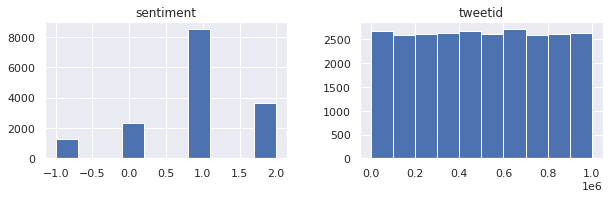

In [59]:
# Using Pairplot method to understand the distribution of each variable
df_new.hist(figsize=(10,2.5))
plt.show()

## Categorical variables

<a id="five"></a>
## 5. Data Engineering

In [73]:
tokeniser = TreebankWordTokenizer()
df_train['tokenised_message'] = df_train['newmessage'].apply(tokeniser.tokenize)
df_train['tokenised_message'].iloc[2]

['rawstory',
 'researchers',
 'have',
 'three',
 'years',
 'climate',
 'change',
 'before',
 'it',
 '’',
 's',
 'late',
 'urlweb',
 'urlweb…']

In [62]:
stemmer = SnowballStemmer('english')

def message_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

df_train['stemmed_message'] = df_train['tokenised_message'].apply(message_stemmer, args=(stemmer, ))

for i, t in enumerate(df_train.iloc[15]['tokenised_message']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[15]['stemmed_message'][i]))

glblctzn             --> glblctzn  
dont                 --> dont      
wan                  --> wan       
na                   --> na        
live                 --> live      
forever              --> forev     
nothing              --> noth      
will                 --> will      
because              --> becaus    
climate              --> climat    
change               --> chang     
����️��              --> ����️��   
taylorswift13        --> taylorswift13
zaynmalik            --> zaynmalik 
urlweb               --> urlweb    


In [63]:
lemmatizer = WordNetLemmatizer()

def message_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

df_train['lemma_message'] = df_train['tokenised_message'].apply(message_lemma, args=(lemmatizer, ))  

for i, t in enumerate(df_train.iloc[1]['tokenised_message']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[1]['lemma_message'][i]))

like                 --> like      
lack                 --> lack      
evidence             --> evidence  
anthropogenic        --> anthropogenic
global               --> global    
warming              --> warming   


<a id="six"></a>
##  Modelling

In [64]:
TFID = TfidfVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.90, 
                             ngram_range=(1, 3))

In [65]:
X = df_train['newmessage']
y = df_train['sentiment']

#df_test
X_real = df_test['newmessage']

In [66]:
X_vec_t = TFID.fit_transform(X)

###real
X_vec_t_real = TFID.transform(X_real)

In [68]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec_t, y, test_size=0.20, random_state=32, stratify=y)

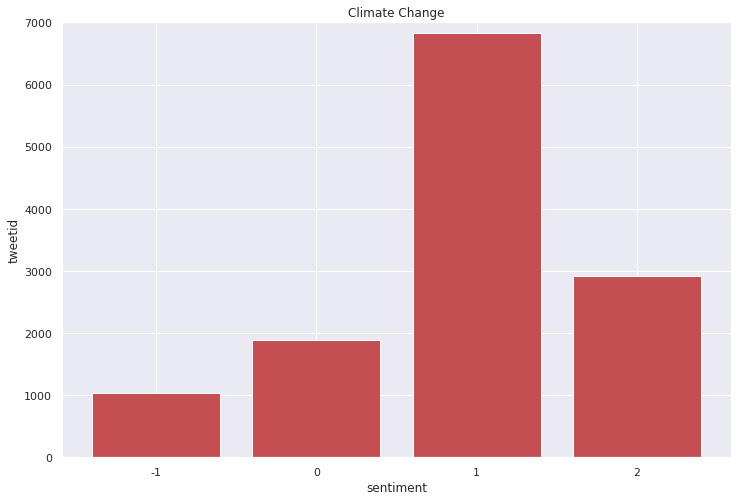

In [92]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)

plt.title('Climate Change')
plt.xlabel('sentiment')
plt.ylabel('tweetid')
plt.xticks(ticks=[-1,0,1,2], labels=[-1,0,1,2])
plt.ylim(top=7000)

plt.show()

### Preparing for modelling

### Base models

In [94]:
# Fitting the Linear SVC model into the train dataset
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)


LinearSVC()

In [95]:
# Fitting the Logistic Regression Classifier model into the train dataset
lm_full = LogisticRegression()
lm_full.fit(X_train, y_train)


LogisticRegression()

In [96]:
#Fitting the lm instance for k-best model into the train dataset
lm_kbest = LogisticRegression()
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=31004)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

# Fit model to the transformed data
lm_kbest.fit(X_train_kbest, y_train)
# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(X_test)


In [97]:
# Fitting the K-Nearest Neighbors model into the train dataset 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

<a id="seven"></a>
## Model Performance

In [98]:
# Use trained model to run prediction on validation data
lsvc_pred= lsvc.predict(X_test)
lm_full_pred= lm_full.predict(X_test)
pred_lm_kbest = lm_kbest.predict(X_test_kbest)
lm_kbest_pred= lm_kbest.predict(X_test)
knn_pred= knn.predict(X_test)

# Score
print("Linear SVC Metrics")
print(metrics.classification_report(y_test, lsvc_pred))

print("Logistic Regression Classifier Metrics")
print(metrics.classification_report(y_test, lm_full_pred))

print("lm instance for k-best Metrics")
print(metrics.classification_report(y_test, pred_lm_kbest))

print("K-nearest neighbors Metrics")
print(metrics.classification_report(y_test, knn_pred))

Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.76      0.51      0.61       259
           0       0.56      0.41      0.47       471
           1       0.76      0.86      0.81      1706
           2       0.75      0.75      0.75       728

    accuracy                           0.74      3164
   macro avg       0.71      0.63      0.66      3164
weighted avg       0.73      0.74      0.73      3164

Logistic Regression Classifier Metrics
              precision    recall  f1-score   support

          -1       0.86      0.34      0.49       259
           0       0.66      0.33      0.44       471
           1       0.72      0.92      0.81      1706
           2       0.79      0.68      0.73       728

    accuracy                           0.73      3164
   macro avg       0.76      0.57      0.62      3164
weighted avg       0.74      0.73      0.71      3164

lm instance for k-best Metrics
              precision    recall  f1-sco

In [ ]:
lsvc_pred_real= lsvc.predict(X_vec_t_real)

In [ ]:
test['sentiment'] = lsvc_pred_real

In [ ]:
df_test.head(25)

,message,tweetid,newmessage,sentiment
0,Europe will now be looking to China to make su...,169760,europe will looking china make sure that alone...,1
1,Combine this with the polling of staffers re c...,35326,combine this with polling staffers climate cha...,1
2,The scary unimpeachable evidence that climate ...,224985,scary unimpeachable evidence that climate chan...,1
3,Karoli morgfair OsborneInk dailykos \nPutin go...,476263,karoli morgfair osborneink dailykos putin jill...,1
4,RT FakeWillMoore Female orgasms cause global w...,872928,fakewillmoore female orgasms cause global warm...,0
5,RT nycjim Trump muzzles employees of several g...,75639,nycjim trump muzzles employees several gov’t a...,1
6,bmastenbrook yes wrote that in 3rd yr Comp Sci...,211536,bmastenbrook wrote that comp ethics part told ...,1
7,RT climatehawk1 Indonesian farmers weather cli...,569434,climatehawk1 indonesian farmers weather climat...,1
8,RT guardian British scientists face a ‘huge hi...,315368,guardian british scientists face ‘huge hit’ cu...,2
9,Aid For Agriculture Sustainable agriculture a...,591733,agriculture sustainable agriculture climate ch...,1


In [ ]:
df_test[['tweetid','sentiment']].to_csv('Team16.csv', index=False)